In [1]:
from Util import prepare_Task, TaskID_Generator
import os 
from Config import DataSetConfig, ModelConfig
import ClassificationTask 
import DataSet
import numpy as np

Classes = []
configs = []

Name = "Cardiomegaly"
Task = "Classification"
DataSetPath = "Generated_Data_20180518_Diaphragm"

Classes.append("Class_0")
Classes.append("Class_1")
Classes.append("Class_2")


GPU_Num, BaseDataPath = prepare_Task(Task)
dataConfig = DataSetConfig(Name, (512,512,1), Classes, DataSetPath)
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_Num
#configs.append(config)

train_data, train_files, train_labels, mean,std = DataSet.get_Data_Set(dataConfig, BaseDataPath,"train")
valid_data, valid_files, valid_labels, _,_ = DataSet.get_Data_Set(dataConfig, BaseDataPath,"validation")
test_data, valid_files, test_labels, _ , _= DataSet.get_Data_Set(dataConfig, BaseDataPath,"test")
train_data = np.asarray(train_data)
train_data -= mean
valid_data -= mean
test_data -= mean

train_data /= std
valid_data /= std
test_data /= std


/home/gyungchan2110/gyungchan2110_python3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


/data/gyungchan2110/Classification/Generated_Data_20180518_Diaphragm/train
train 120
 : --- 10.797092914581299 seconds ---
/data/gyungchan2110/Classification/Generated_Data_20180518_Diaphragm/validation
validation 30
 : --- 2.3085644245147705 seconds ---
/data/gyungchan2110/Classification/Generated_Data_20180518_Diaphragm/test
test 36
 : --- 3.016084909439087 seconds ---


3
Train_20180521_172507


/home/gyungchan2110/gyungchan2110_python3/Integrated_CNN_Project/ModelLIB_Diap.py:89: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pp...)`
  model = Model (input = model.input, output = out)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

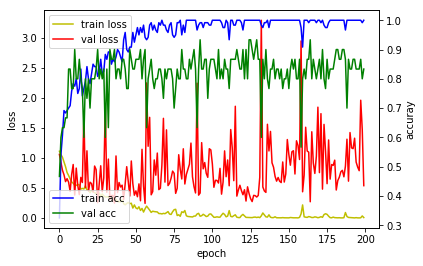

Train Done ! 


NameError: name 'Train_TaskIDs' is not defined

In [2]:
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

ModelConfigs = []

# config = ModelConfig(Name, "XCEPTION", "ADAM",16, 1e-5)
# config.HEIGHT_SHIFT_RANGE = 0.25
# config.WIDTH_SHIFT_RANGE = 0.1
# config.ROTATION_RANGE = 0
# config.ZOOM_RANGE = 0.06
# ModelConfigs.append(config)

config = ModelConfig(Name, "XCEPTION", "ADAM",1, 1e-5)
config.HEIGHT_SHIFT_RANGE = 0.25
config.WIDTH_SHIFT_RANGE = 0.1
config.ROTATION_RANGE = 0
config.ZOOM_RANGE = 0.06

config.PRETRAINED_MODEL = "/data/gyungchan2110/Classification/LOGS/Models/XCEPTION_20180409_081750.hdf5"
ModelConfigs.append(config)

#ModelConfigs.append(config)


# for i in range(10):
#     for j in range(10):
#         for k in range(10):
#             for m in range(10):
#                 config = ModelConfig(Name, "XCEPTION", "ADAM",16, 1e-4)
#                 config.ROTATION_RANGE = i * 2
#                 config.WIDTH_SHIFT_RANGE = 0.05*j
#                 config.HEIGHT_SHIFT_RANGE = 0.05*k
#                 config.ZOOM_RANGE = 0.01*m

#                 ModelConfigs.append(config)
    
# Train_TaskIDs = []


for i in range(len(ModelConfigs)):
    GPU_Num, BaseDataPath = prepare_Task("Classification")
    TaskID = TaskID_Generator() 
    os.environ["CUDA_VISIBLE_DEVICES"] = GPU_Num
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    print(GPU_Num)
    result , filename = ClassificationTask.Train_DataSet(TaskID, BaseDataPath, dataConfig, ModelConfigs[i], train_data, valid_data, train_labels, valid_labels)
    trainID = "Train_" + TaskID
    Train_TaskIDs.append(trainID)
    if(result):
        ClassificationTask.Test_Dataset(TaskID, BaseDataPath, dataConfig, filename, test_data, test_labels)

['XCEPTION_20180521_172507.hdf5_052.hdf5', 'XCEPTION_20180521_172507.hdf5_050.hdf5', 'XCEPTION_20180521_172507.hdf5_130.hdf5', 'XCEPTION_20180521_172507.hdf5_098.hdf5', 'XCEPTION_20180521_172507.hdf5_110.hdf5', 'XCEPTION_20180521_172507.hdf5_136.hdf5', 'XCEPTION_20180521_172507.hdf5_080.hdf5', 'XCEPTION_20180521_172507.hdf5_058.hdf5', 'XCEPTION_20180521_172507.hdf5_192.hdf5', 'XCEPTION_20180521_172507.hdf5_006.hdf5', 'XCEPTION_20180521_172507.hdf5_132.hdf5', 'XCEPTION_20180521_172507.hdf5_170.hdf5', 'XCEPTION_20180521_172507.hdf5_036.hdf5', 'XCEPTION_20180521_172507.hdf5_090.hdf5', 'XCEPTION_20180521_172507.hdf5_154.hdf5', 'XCEPTION_20180521_172507.hdf5_112.hdf5', 'XCEPTION_20180521_172507.hdf5_034.hdf5', 'XCEPTION_20180521_172507.hdf5_040.hdf5', 'History_20180521_172507.txt', 'XCEPTION_20180521_172507.hdf5_156.hdf5', 'Cardiomegaly_DataSet.txt', 'XCEPTION_20180521_172507.hdf5_122.hdf5', 'XCEPTION_20180521_172507.hdf5_184.hdf5', 'events.out.tfevents.1526891132.deepserver', 'XCEPTION_201

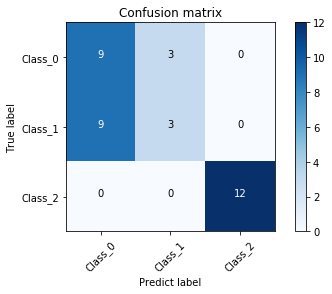

Test Done ! 
XCEPTION_20180521_172507.hdf5_050.hdf5
Test_20180523_091751
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


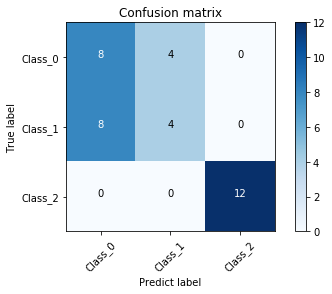

Test Done ! 
XCEPTION_20180521_172507.hdf5_130.hdf5
Test_20180523_091809
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 4  8  0]
 [ 6  6  0]
 [ 0  0 12]]


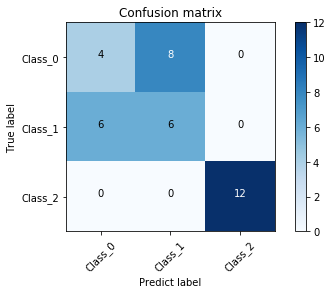

Test Done ! 
XCEPTION_20180521_172507.hdf5_098.hdf5
Test_20180523_091826
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
0.6944444444444444
Confusion matrix, without normalization
[[11  1  0]
 [10  2  0]
 [ 0  0 12]]


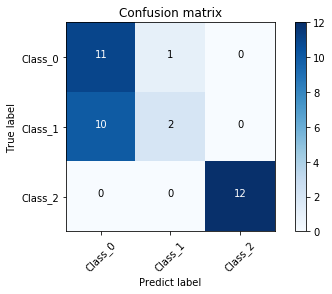

Test Done ! 
XCEPTION_20180521_172507.hdf5_110.hdf5
Test_20180523_091843
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 7  5  0]
 [ 9  3  0]
 [ 0  0 12]]


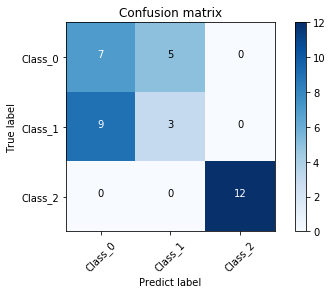

Test Done ! 
XCEPTION_20180521_172507.hdf5_136.hdf5
Test_20180523_091903
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 7  5  0]
 [ 9  3  0]
 [ 0  0 12]]


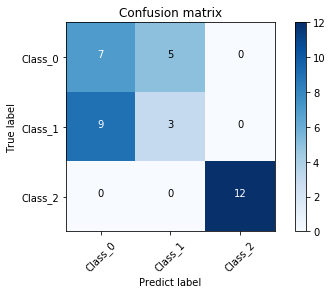

Test Done ! 
XCEPTION_20180521_172507.hdf5_080.hdf5
Test_20180523_091920
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


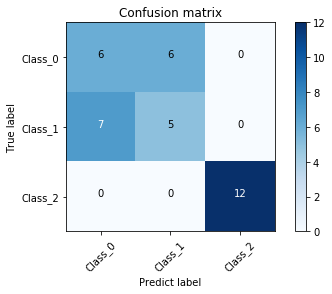

Test Done ! 
XCEPTION_20180521_172507.hdf5_058.hdf5
Test_20180523_091937
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 5  7  0]
 [ 5  5  2]
 [ 0  0 12]]


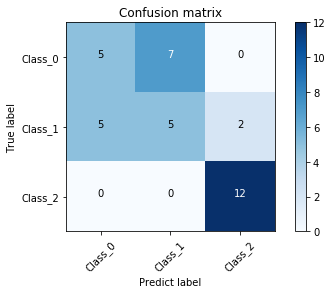

Test Done ! 
XCEPTION_20180521_172507.hdf5_192.hdf5
Test_20180523_091955
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 8  4  0]
 [ 6  6  0]
 [ 0  0 12]]


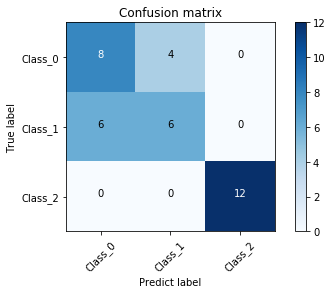

Test Done ! 
XCEPTION_20180521_172507.hdf5_006.hdf5
Test_20180523_092012
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 2 10  0]
 [ 2  9  1]
 [ 0  0 12]]


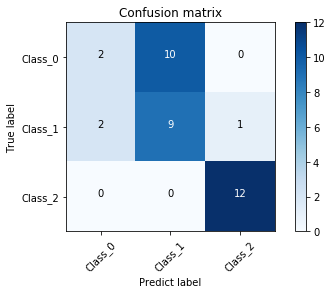

Test Done ! 
XCEPTION_20180521_172507.hdf5_132.hdf5
Test_20180523_092030
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


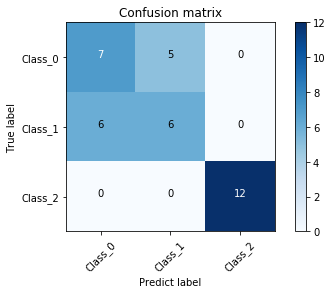

Test Done ! 
XCEPTION_20180521_172507.hdf5_170.hdf5
Test_20180523_092047
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 8  4  0]
 [ 9  3  0]
 [ 0  0 12]]


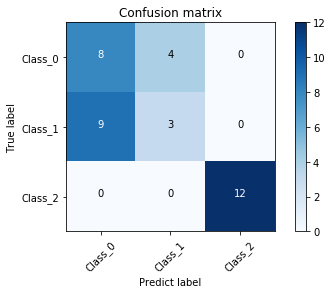

Test Done ! 
XCEPTION_20180521_172507.hdf5_036.hdf5
Test_20180523_092103
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 6  6  0]
 [ 6  6  0]
 [ 0  0 12]]


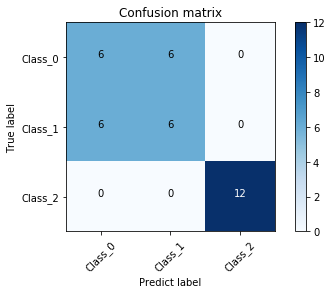

Test Done ! 
XCEPTION_20180521_172507.hdf5_090.hdf5
Test_20180523_092122
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 9  3  0]
 [ 9  3  0]
 [ 0  0 12]]


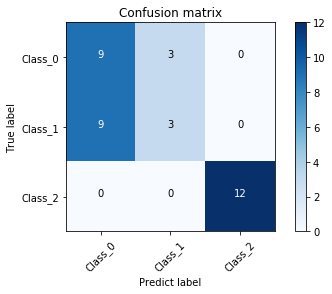

Test Done ! 
XCEPTION_20180521_172507.hdf5_154.hdf5
Test_20180523_092140
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
0.6388888888888888
Confusion matrix, without normalization
[[ 8  4  0]
 [ 9  3  0]
 [ 0  0 12]]


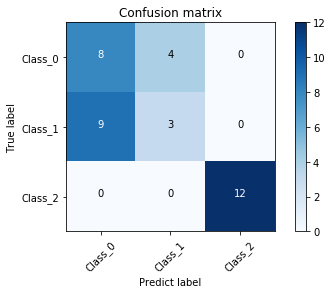

Test Done ! 
XCEPTION_20180521_172507.hdf5_112.hdf5
Test_20180523_092157
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
0.6944444444444444
Confusion matrix, without normalization
[[ 9  3  0]
 [ 8  4  0]
 [ 0  0 12]]


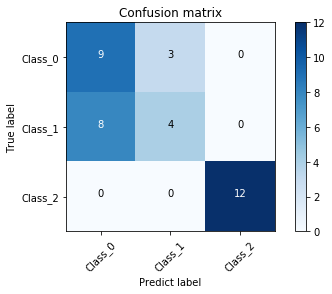

Test Done ! 
XCEPTION_20180521_172507.hdf5_034.hdf5
Test_20180523_092214
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


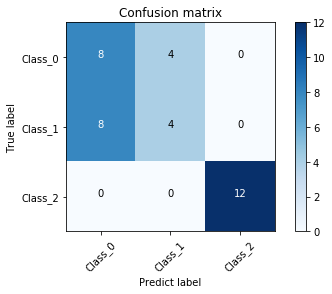

Test Done ! 
XCEPTION_20180521_172507.hdf5_040.hdf5
Test_20180523_092233
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


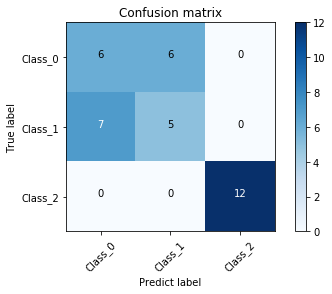

Test Done ! 
XCEPTION_20180521_172507.hdf5_156.hdf5
Test_20180523_092251
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 7  5  0]
 [ 7  5  0]
 [ 0  0 12]]


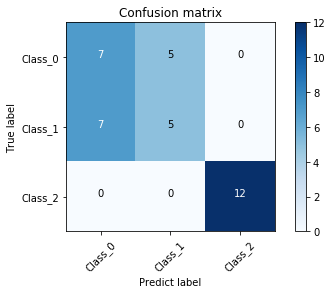

Test Done ! 
XCEPTION_20180521_172507.hdf5_122.hdf5
Test_20180523_092310
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


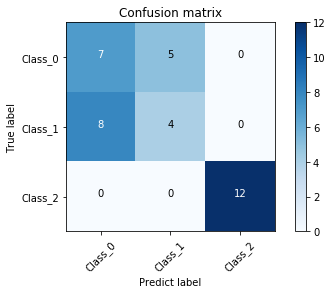

Test Done ! 
XCEPTION_20180521_172507.hdf5_184.hdf5
Test_20180523_092328
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


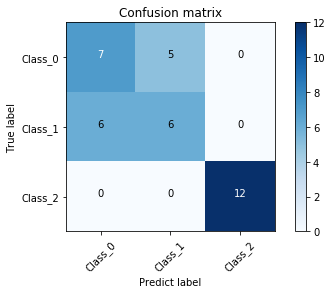

Test Done ! 
XCEPTION_20180521_172507.hdf5_074.hdf5
Test_20180523_092344
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 6  6  0]
 [ 5  7  0]
 [ 0  0 12]]


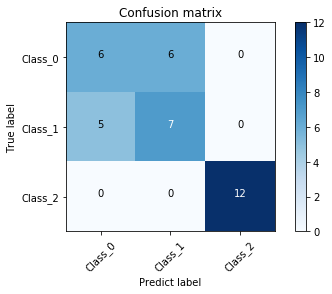

Test Done ! 
XCEPTION_20180521_172507.hdf5_012.hdf5
Test_20180523_092402
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
0.6388888888888888
Confusion matrix, without normalization
[[ 9  3  0]
 [ 9  2  1]
 [ 0  0 12]]


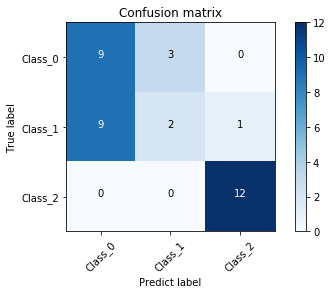

Test Done ! 
XCEPTION_20180521_172507.hdf5_078.hdf5
Test_20180523_092420
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 9  3  0]
 [ 9  3  0]
 [ 0  0 12]]


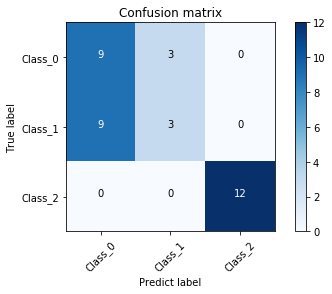

Test Done ! 
XCEPTION_20180521_172507.hdf5_178.hdf5
Test_20180523_092438
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 7  5  0]
 [ 5  7  0]
 [ 0  0 12]]


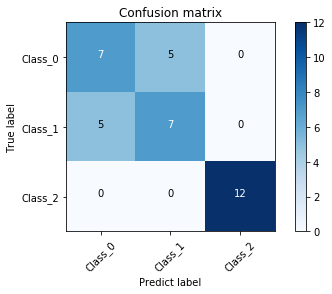

Test Done ! 
XCEPTION_20180521_172507.hdf5_010.hdf5
Test_20180523_092455
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 4  8  0]
 [ 4  6  2]
 [ 0  0 12]]


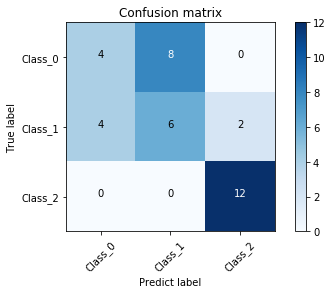

Test Done ! 
XCEPTION_20180521_172507.hdf5_104.hdf5
Test_20180523_092513
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 6  6  0]
 [ 8  4  0]
 [ 0  0 12]]


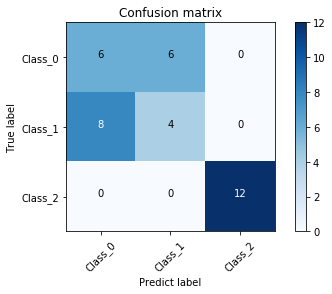

Test Done ! 
XCEPTION_20180521_172507.hdf5_152.hdf5
Test_20180523_092530
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


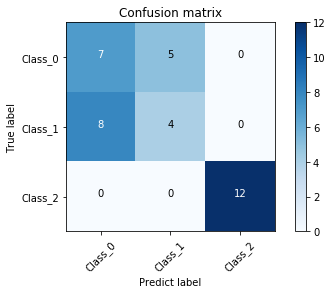

Test Done ! 
XCEPTION_20180521_172507.hdf5_032.hdf5
Test_20180523_092549
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
0.6944444444444444
Confusion matrix, without normalization
[[ 9  3  0]
 [ 8  4  0]
 [ 0  0 12]]


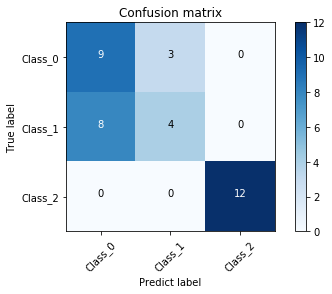

Test Done ! 
XCEPTION_20180521_172507.hdf5_196.hdf5
Test_20180523_092608
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


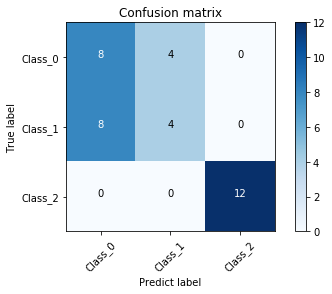

Test Done ! 
XCEPTION_20180521_172507.hdf5_116.hdf5
Test_20180523_092624
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  4  1]
 [ 5  6  1]
 [ 0  0 12]]


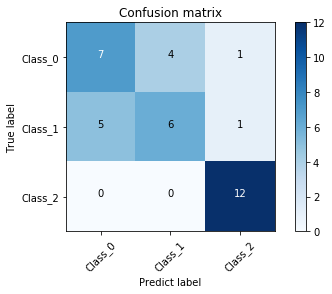

Test Done ! 
XCEPTION_20180521_172507.hdf5_200.hdf5
Test_20180523_092642
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


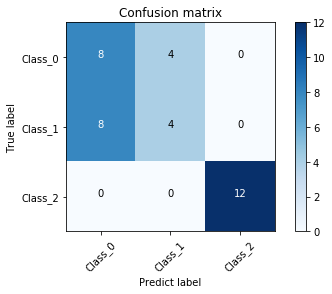

Test Done ! 
XCEPTION_20180521_172507.hdf5_018.hdf5
Test_20180523_092701
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
0.6944444444444444
Confusion matrix, without normalization
[[10  2  0]
 [ 9  3  0]
 [ 0  0 12]]


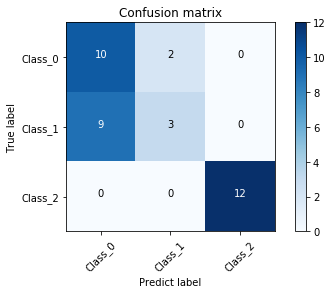

Test Done ! 
XCEPTION_20180521_172507.hdf5_022.hdf5
Test_20180523_092719
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


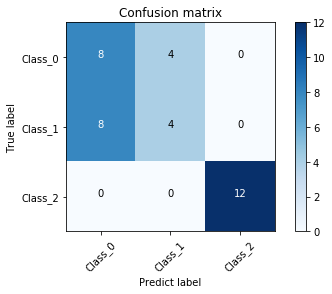

Test Done ! 
XCEPTION_20180521_172507.hdf5_158.hdf5
Test_20180523_092740
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 8  4  0]
 [ 7  5  0]
 [ 0  0 12]]


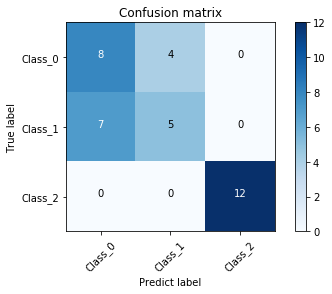

Test Done ! 
XCEPTION_20180521_172507.hdf5_142.hdf5
Test_20180523_092800
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 8  4  0]
 [ 6  6  0]
 [ 0  0 12]]


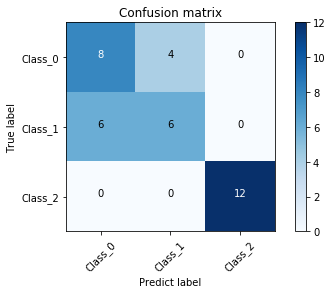

Test Done ! 
XCEPTION_20180521_172507.hdf5_042.hdf5
Test_20180523_092821
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


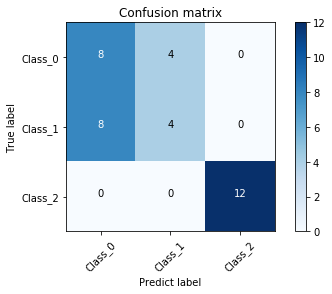

Test Done ! 
XCEPTION_20180521_172507.hdf5_060.hdf5
Test_20180523_092839
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.5833333333333334
Confusion matrix, without normalization
[[ 5  7  0]
 [ 7  4  1]
 [ 0  0 12]]


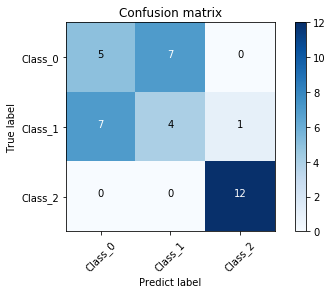

Test Done ! 
XCEPTION_20180521_172507.hdf5_024.hdf5
Test_20180523_092858
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
0.6944444444444444
Confusion matrix, without normalization
[[ 8  4  0]
 [ 7  5  0]
 [ 0  0 12]]


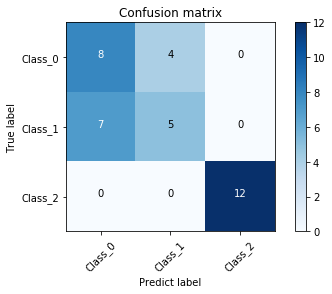

Test Done ! 
XCEPTION_20180521_172507.hdf5_030.hdf5
Test_20180523_092918
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


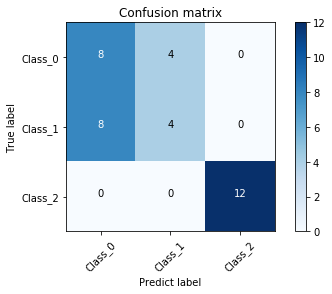

Test Done ! 
XCEPTION_20180521_172507.hdf5_056.hdf5
Test_20180523_092936
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 6  6  0]
 [ 8  4  0]
 [ 0  0 12]]


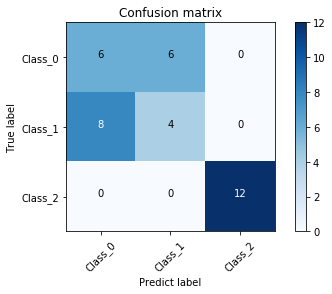

Test Done ! 
XCEPTION_20180521_172507.hdf5_186.hdf5
Test_20180523_092954
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


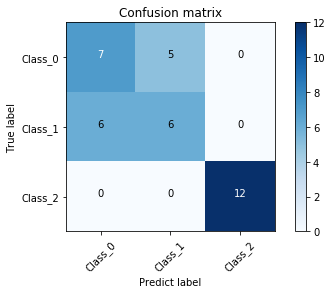

Test Done ! 
XCEPTION_20180521_172507.hdf5_168.hdf5
Test_20180523_093011
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
0.75
Confusion matrix, without normalization
[[11  1  0]
 [ 8  4  0]
 [ 0  0 12]]


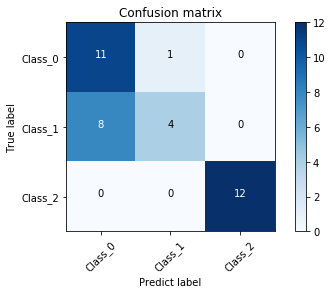

Test Done ! 
XCEPTION_20180521_172507.hdf5_180.hdf5
Test_20180523_093029
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 7  5  0]
 [ 7  5  0]
 [ 0  0 12]]


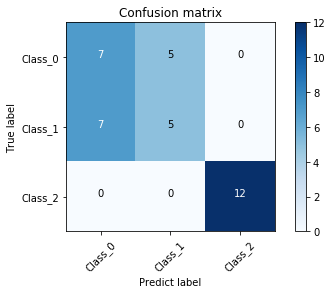

Test Done ! 
XCEPTION_20180521_172507.hdf5_076.hdf5
Test_20180523_093047
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[11  1  0]
 [ 9  3  0]
 [ 0  0 12]]


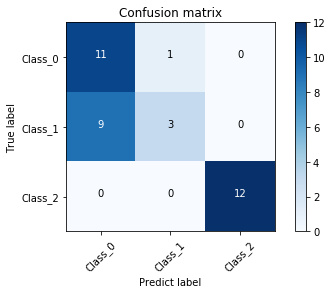

Test Done ! 
XCEPTION_20180521_172507.hdf5_092.hdf5
Test_20180523_093105
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


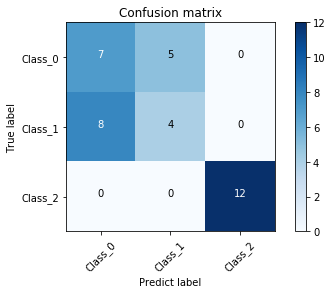

Test Done ! 
XCEPTION_20180521_172507.hdf5_114.hdf5
Test_20180523_093123
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


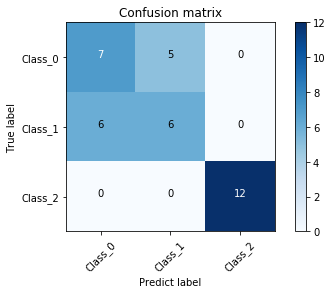

Test Done ! 
XCEPTION_20180521_172507.hdf5_106.hdf5
Test_20180523_093141
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 7  5  0]
 [ 9  3  0]
 [ 0  0 12]]


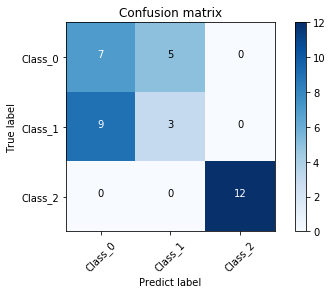

Test Done ! 
XCEPTION_20180521_172507.hdf5_068.hdf5
Test_20180523_093159
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 6  6  0]
 [ 8  4  0]
 [ 0  0 12]]


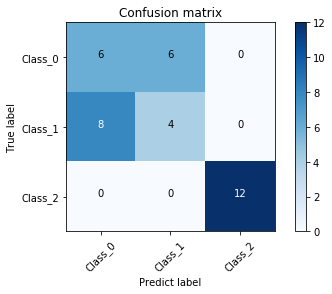

Test Done ! 
XCEPTION_20180521_172507.hdf5_066.hdf5
Test_20180523_093216
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 9  3  0]
 [ 9  3  0]
 [ 0  0 12]]


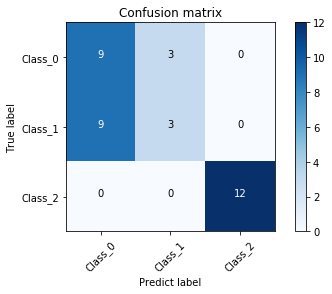

Test Done ! 
XCEPTION_20180521_172507.hdf5_008.hdf5
Test_20180523_093236
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 6  6  0]
 [ 0  1 11]]


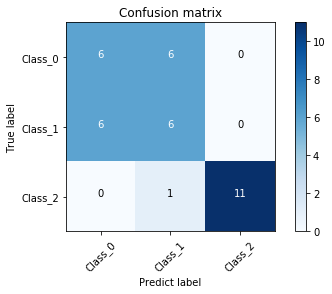

Test Done ! 
XCEPTION_20180521_172507.hdf5_198.hdf5
Test_20180523_093254
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 8  4  0]
 [ 7  5  0]
 [ 0  0 12]]


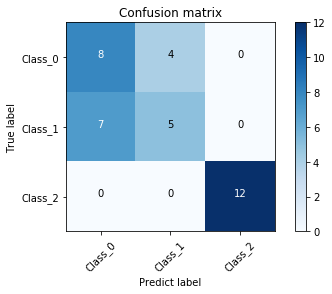

Test Done ! 
XCEPTION_20180521_172507.hdf5_138.hdf5
Test_20180523_093315
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 9  3  0]
 [ 8  4  0]
 [ 0  0 12]]


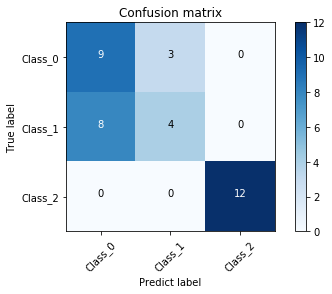

Test Done ! 
XCEPTION_20180521_172507.hdf5_146.hdf5
Test_20180523_093336
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


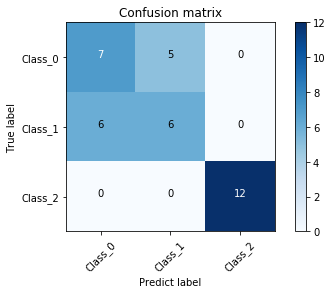

Test Done ! 
XCEPTION_20180521_172507.hdf5_094.hdf5
Test_20180523_093357
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


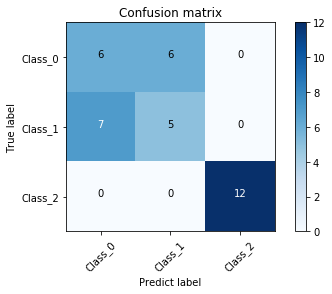

Test Done ! 
XCEPTION_20180521_172507.hdf5_174.hdf5
Test_20180523_093417
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 5  7  0]
 [ 3  9  0]
 [ 0  0 12]]


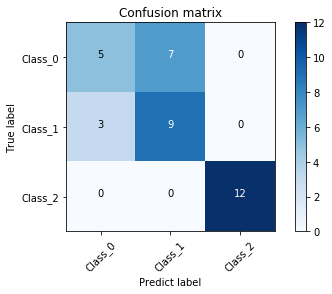

Test Done ! 
XCEPTION_20180521_172507.hdf5_118.hdf5
Test_20180523_093437
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 8  4  0]
 [ 6  6  0]
 [ 0  0 12]]


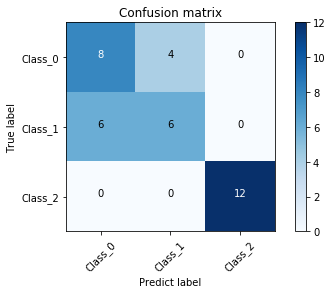

Test Done ! 
XCEPTION_20180521_172507.hdf5_144.hdf5
Test_20180523_093457
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


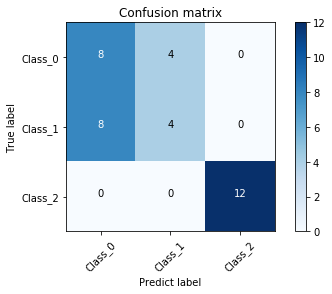

Test Done ! 
XCEPTION_20180521_172507.hdf5_004.hdf5
Test_20180523_093516
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 4  8  0]
 [ 3  7  2]
 [ 0  0 12]]


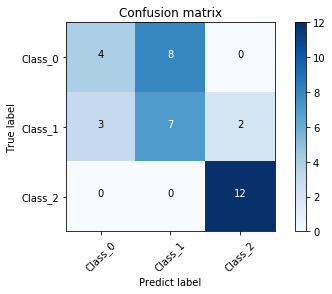

Test Done ! 
XCEPTION_20180521_172507.hdf5_082.hdf5
Test_20180523_093537
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 7  5  0]
 [ 9  3  0]
 [ 0  0 12]]


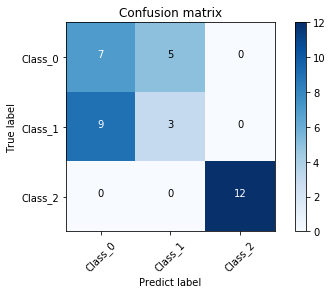

Test Done ! 
XCEPTION_20180521_172507.hdf5_014.hdf5
Test_20180523_093555
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 9  3  0]
 [ 8  4  0]
 [ 0  1 11]]


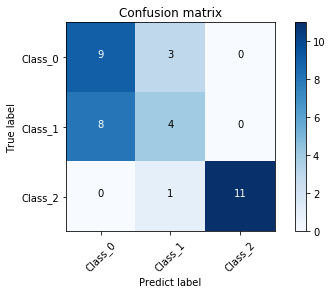

Test Done ! 
XCEPTION_20180521_172507.hdf5_182.hdf5
Test_20180523_093615
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 7  5  0]
 [ 7  5  0]
 [ 0  0 12]]


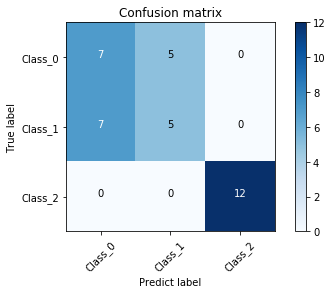

Test Done ! 
XCEPTION_20180521_172507.hdf5_100.hdf5
Test_20180523_093635
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


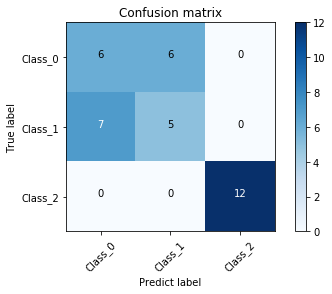

Test Done ! 
XCEPTION_20180521_172507.hdf5_046.hdf5
Test_20180523_093656
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.6111111111111112
Confusion matrix, without normalization
[[ 5  7  0]
 [ 7  5  0]
 [ 0  0 12]]


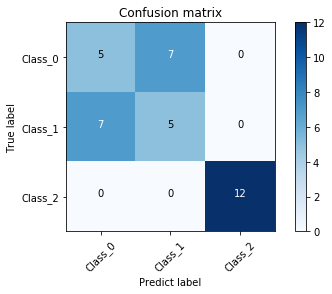

Test Done ! 
XCEPTION_20180521_172507.hdf5_148.hdf5
Test_20180523_093716
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
0.7222222222222222
Confusion matrix, without normalization
[[ 9  3  0]
 [ 7  5  0]
 [ 0  0 12]]


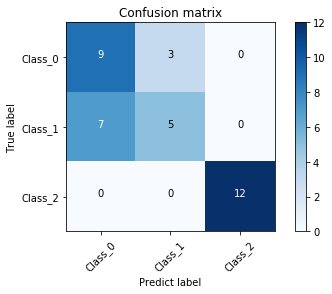

Test Done ! 
XCEPTION_20180521_172507.hdf5_026.hdf5
Test_20180523_093737
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 7  5  0]
 [ 7  5  0]
 [ 0  0 12]]


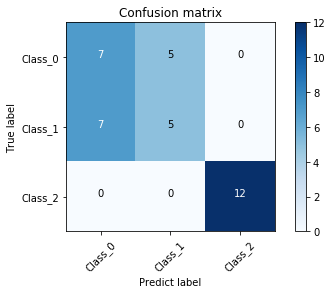

Test Done ! 
XCEPTION_20180521_172507.hdf5_096.hdf5
Test_20180523_093757
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


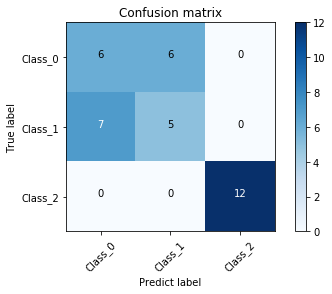

Test Done ! 
XCEPTION_20180521_172507.hdf5_002.hdf5
Test_20180523_093818
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.5833333333333334
Confusion matrix, without normalization
[[ 0 12  0]
 [ 0 10  2]
 [ 0  1 11]]


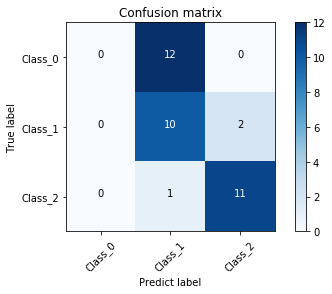

/home/gyungchan2110/gyungchan2110_python3/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test Done ! 
XCEPTION_20180521_172507.hdf5_172.hdf5
Test_20180523_093838
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


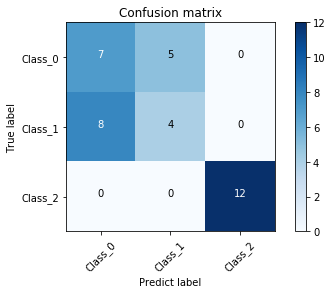

Test Done ! 
XCEPTION_20180521_172507.hdf5_150.hdf5
Test_20180523_093859
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


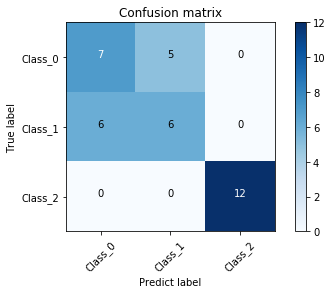

Test Done ! 
XCEPTION_20180521_172507.hdf5_108.hdf5
Test_20180523_093920
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
0.7222222222222222
Confusion matrix, without normalization
[[11  1  0]
 [ 9  3  0]
 [ 0  0 12]]


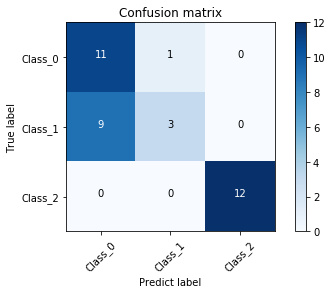

Test Done ! 
XCEPTION_20180521_172507.hdf5_166.hdf5
Test_20180523_093938
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


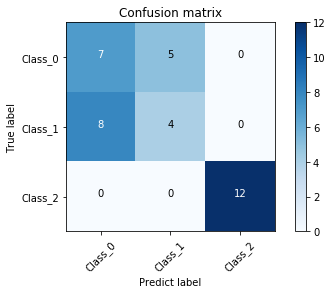

Test Done ! 
XCEPTION_20180521_172507.hdf5_048.hdf5
Test_20180523_093959
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


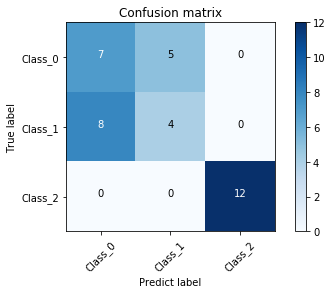

Test Done ! 
XCEPTION_20180521_172507.hdf5_020.hdf5
Test_20180523_094018
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[ 9  3  0]
 [ 9  3  0]
 [ 0  0 12]]


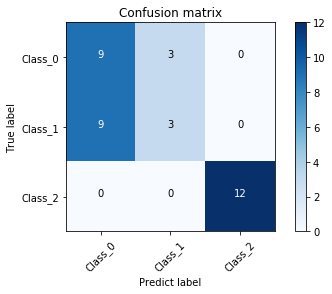

Test Done ! 
XCEPTION_20180521_172507.hdf5_126.hdf5
Test_20180523_094036
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 8  4  0]
 [ 7  5  0]
 [ 0  0 12]]


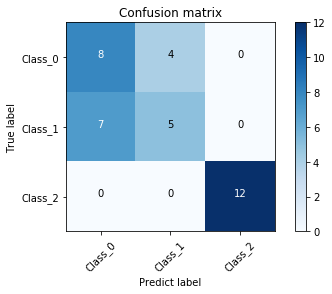

Test Done ! 
XCEPTION_20180521_172507.hdf5_140.hdf5
Test_20180523_094055
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 8  4  0]
 [ 7  5  0]
 [ 0  0 12]]


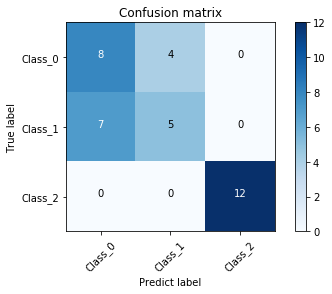

Test Done ! 
XCEPTION_20180521_172507.hdf5_088.hdf5
Test_20180523_094115
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 7  5  0]
 [ 7  5  0]
 [ 0  0 12]]


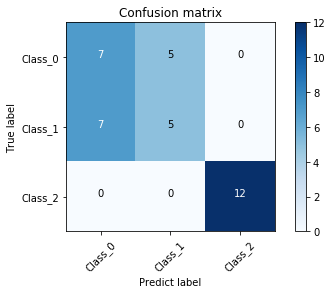

Test Done ! 
XCEPTION_20180521_172507.hdf5_062.hdf5
Test_20180523_094136
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.75
Confusion matrix, without normalization
[[12  0  0]
 [ 9  3  0]
 [ 0  0 12]]


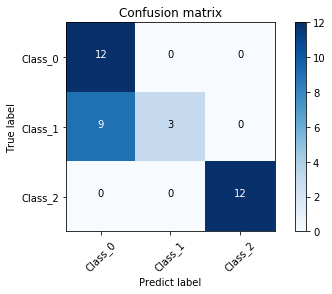

Test Done ! 
XCEPTION_20180521_172507.hdf5_102.hdf5
Test_20180523_094155
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


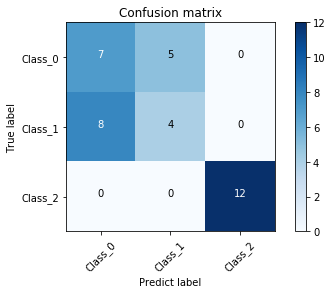

Test Done ! 
XCEPTION_20180521_172507.hdf5_086.hdf5
Test_20180523_094216
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


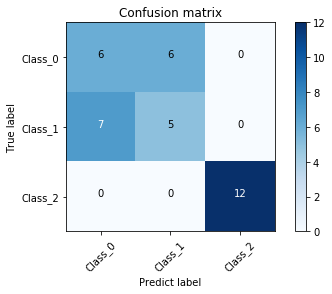

Test Done ! 
XCEPTION_20180521_172507.hdf5_128.hdf5
Test_20180523_094236
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


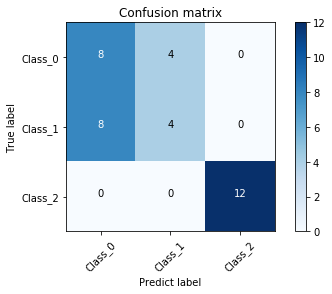

Test Done ! 
XCEPTION_20180521_172507.hdf5_120.hdf5
Test_20180523_094257
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


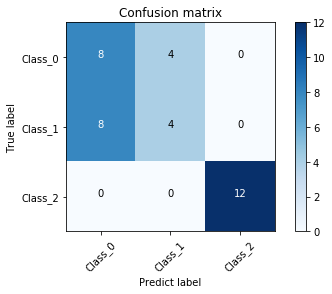

Test Done ! 
XCEPTION_20180521_172507.hdf5_028.hdf5
Test_20180523_094317
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 6  6  0]
 [ 6  6  0]
 [ 0  0 12]]


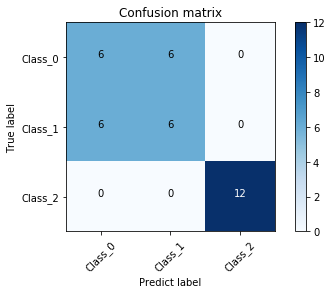

Test Done ! 
XCEPTION_20180521_172507.hdf5_190.hdf5
Test_20180523_094338
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 8  4  0]
 [ 6  6  0]
 [ 0  0 12]]


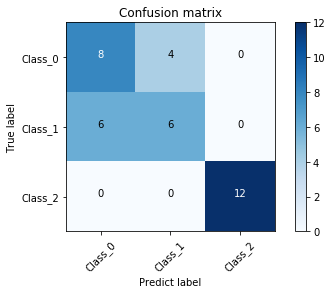

Test Done ! 
XCEPTION_20180521_172507.hdf5_188.hdf5
Test_20180523_094358
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 9  3  0]
 [ 8  4  0]
 [ 0  0 12]]


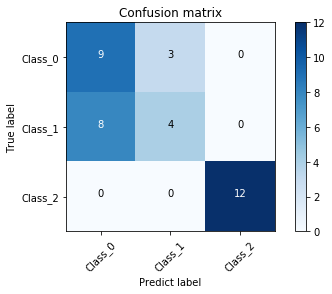

Test Done ! 
XCEPTION_20180521_172507.hdf5_124.hdf5
Test_20180523_094417
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 6  6  0]
 [ 6  6  0]
 [ 0  0 12]]


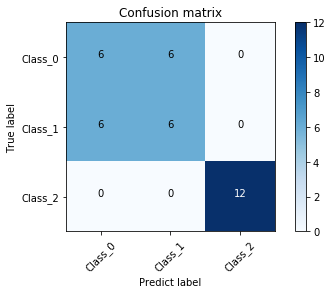

Test Done ! 
XCEPTION_20180521_172507.hdf5_160.hdf5
Test_20180523_094437
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.6666666666666666
Confusion matrix, without normalization
[[12  0  0]
 [11  1  0]
 [ 0  1 11]]


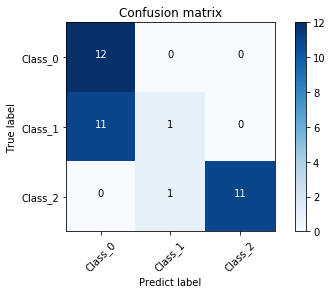

Test Done ! 
XCEPTION_20180521_172507.hdf5_194.hdf5
Test_20180523_094457
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 7  5  0]
 [ 6  6  0]
 [ 0  0 12]]


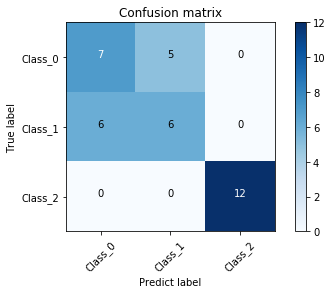

Test Done ! 
XCEPTION_20180521_172507.hdf5_054.hdf5
Test_20180523_094516
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


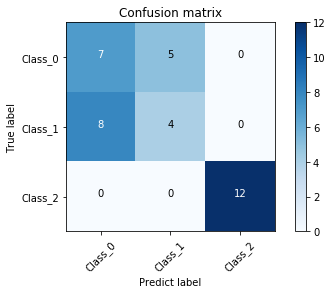

Test Done ! 
XCEPTION_20180521_172507.hdf5_044.hdf5
Test_20180523_094537
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


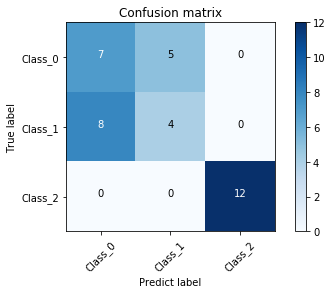

Test Done ! 
XCEPTION_20180521_172507.hdf5_134.hdf5
Test_20180523_094556
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 8  4  0]
 [ 8  4  0]
 [ 0  0 12]]


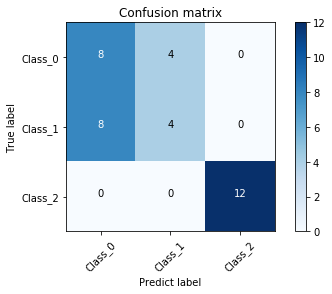

Test Done ! 
XCEPTION_20180521_172507.hdf5_162.hdf5
Test_20180523_094617
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[ 5  7  0]
 [ 4  8  0]
 [ 0  0 12]]


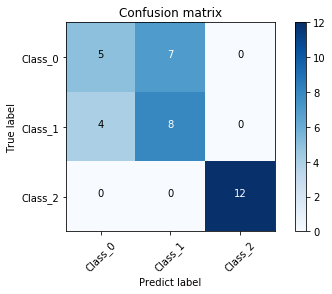

Test Done ! 
XCEPTION_20180521_172507.hdf5_072.hdf5
Test_20180523_094637
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


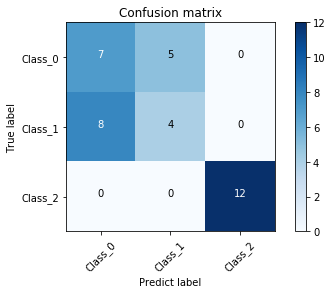

Test Done ! 
XCEPTION_20180521_172507.hdf5_064.hdf5
Test_20180523_094656
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.6666666666666666
Confusion matrix, without normalization
[[ 5  7  0]
 [ 5  7  0]
 [ 0  0 12]]


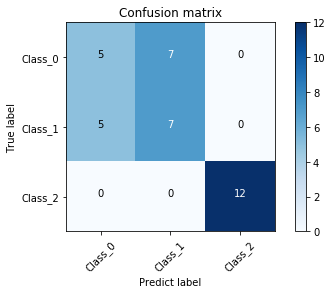

Test Done ! 
XCEPTION_20180521_172507.hdf5_084.hdf5
Test_20180523_094717
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 6  6  0]
 [ 7  5  0]
 [ 0  0 12]]


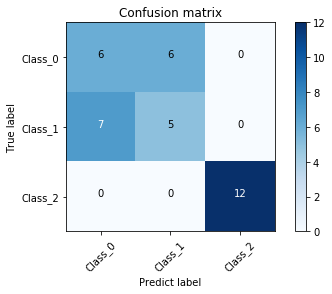

Test Done ! 
XCEPTION_20180521_172507.hdf5_038.hdf5
Test_20180523_094736
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
0.5833333333333334
Confusion matrix, without normalization
[[ 5  7  0]
 [ 7  4  1]
 [ 0  0 12]]


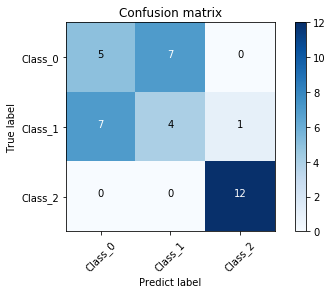

Test Done ! 
XCEPTION_20180521_172507.hdf5_176.hdf5
Test_20180523_094756
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
0.6388888888888888
Confusion matrix, without normalization
[[ 7  5  0]
 [ 8  4  0]
 [ 0  0 12]]


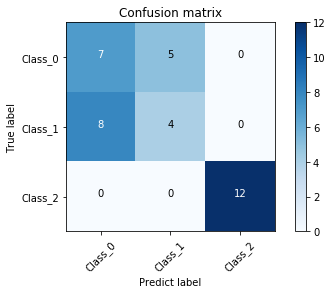

Test Done ! 
XCEPTION_20180521_172507.hdf5_016.hdf5
Test_20180523_094817
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
0.7222222222222222
Confusion matrix, without normalization
[[11  1  0]
 [ 9  3  0]
 [ 0  0 12]]


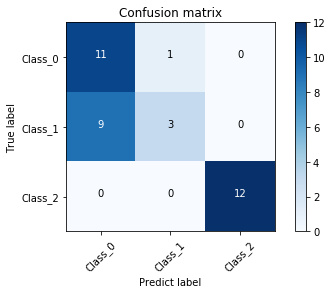

Test Done ! 
XCEPTION_20180521_172507.hdf5_070.hdf5
Test_20180523_094837
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
0.6944444444444444
Confusion matrix, without normalization
[[10  2  0]
 [ 9  3  0]
 [ 0  0 12]]


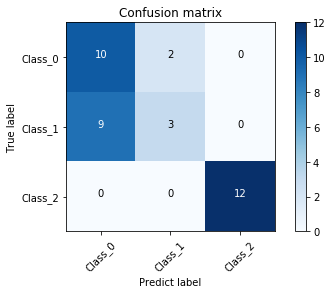

Test Done ! 
XCEPTION_20180521_172507.hdf5_164.hdf5
Test_20180523_094857
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
0.7222222222222222
Confusion matrix, without normalization
[[ 8  4  0]
 [ 6  6  0]
 [ 0  0 12]]


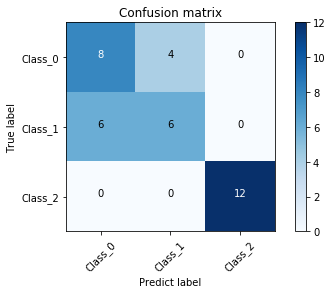

Test Done ! 


In [3]:
#for Train_TaskID in Train_TaskIDs: 
ModelsFolder = BaseDataPath + "/LOGS/logs/" + trainID

filenames = os.listdir(ModelsFolder)
count = 0
print(filenames)
for filename in filenames:
    full_filename = os.path.join(ModelsFolder, filename)
    ext = os.path.splitext(full_filename)[-1]
    if ext == '.hdf5': 
        ModelFile = trainID + "/" + filename
        GPU_Num, BaseDataPath = prepare_Task("Classification")
        TaskID = TaskID_Generator() 
        os.environ["CUDA_VISIBLE_DEVICES"] = GPU_Num
        print(filename)
        ClassificationTask.Test_Dataset(TaskID, BaseDataPath, dataConfig, ModelFile, test_data, test_labels, True)


In [1]:
from Util import prepare_Task, TaskID_Generator
import os 
from Config import DataSetConfig, ModelConfig
import ClassificationTask 
import DataSet
import numpy as np

Classes = []
configs = []

Name = "Cardiomegaly"
Task = "Classification"
DataSetPath = "Generated_Data_20180518_Diaphragm_Whole"

Classes.append("Class_0")
Classes.append("Class_1")
Classes.append("Class_2")


GPU_Num, BaseDataPath = prepare_Task(Task)
dataConfig = DataSetConfig(Name, (512,512,1), Classes, DataSetPath)
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_Num
#configs.append(config)

#train_data, train_files, train_labels, mean,std = DataSet.get_Data_Set(dataConfig, BaseDataPath,"train")
#valid_data, valid_files, valid_labels, _,_ = DataS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             et.get_Data_Set(dataConfig, BaseDataPath,"validation")
test_data, valid_files, test_labels, mean, std= DataSet.get_Data_Set(dataConfig, BaseDataPath,"test")
#train_data = np.asarray(train_data)
#train_data -= mean
#valid_data -= mean
test_data -= mean

#train_data /= std
#valid_data /= std
test_data /= std

# config = ModelConfig(Name, "XCEPTION", "ADAM",1, 1e-5)
# config.HEIGHT_SHIFT_RANGE = 0.25
# config.WIDTH_SHIFT_RANGE = 0.1
# config.ROTATION_RANGE = 0
# config.ZOOM_RANGE = 0.06

# #config.PRETRAINED_MODEL = "/data/gyungchan2110/Classification/LOGS/Models/XCEPTION_20180409_081750.hdf5"
# ModelConfigs.append(config)
ModelFile = "XCEPTION_20180521_172507.hdf5"

GPU_Num, BaseDataPath = prepare_Task("Classification")
TaskID = TaskID_Generator() 
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_Num

ClassificationTask.Test_Dataset(TaskID, BaseDataPath, dataConfig, ModelFile, test_data, test_labels, False)


/home/gyungchan2110/gyungchan2110_python3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


/data/gyungchan2110/Classification/Generated_Data_20180518_Diaphragm_Whole/test
test 2020
 : --- 186.0981481075287 seconds ---
Test_20180523_132604
[1. 1. 1. ... 0. 0. 0.]
0.12376237623762376
Confusion matrix, without normalization
[[ 108   58 1083]
 [  10   80  619]
 [   0    0   62]]


<Figure size 640x480 with 2 Axes>

Test Done ! 


0.12376237623762376